In [1]:
import pandas
import seaborn
from matplotlib import pyplot

In [2]:
df = pandas.read_csv('/config/workspace/notebooks/data/Diamond.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df[df.price == max(df.price)]

,id,carat,cut,color,clarity,depth,table,x,y,z,price
693,693,2.01,Premium,G,SI1,62.0,58.0,8.10,8.04,5.00,18818
9224,9224,2.00,Very Good,G,SI1,63.5,56.0,8.03,7.97,5.05,18818
59270,59270,2.29,Premium,G,SI1,62.6,57.0,8.37,8.33,5.23,18818
123163,123163,1.70,Ideal,G,VS1,61.7,55.0,7.70,7.60,4.73,18818
153958,153958,2.00,Very Good,F,SI1,59.2,60.0,8.09,8.14,4.86,18818
180559,180559,2.15,Premium,E,SI2,61.7,58.0,8.34,8.31,5.10,18818


In [4]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

*NO MISSING VALUES IN THE GIVEN DATA*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.duplicated().sum()

0

*id column is not required hence lets drop it.*

In [8]:
df = df.drop(columns=['id'])

In [9]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [10]:
num_columns = df.columns[df.dtypes != 'O']
cat_columns = df.columns[df.dtypes == 'O']

In [11]:
df[num_columns].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [12]:
df[cat_columns].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


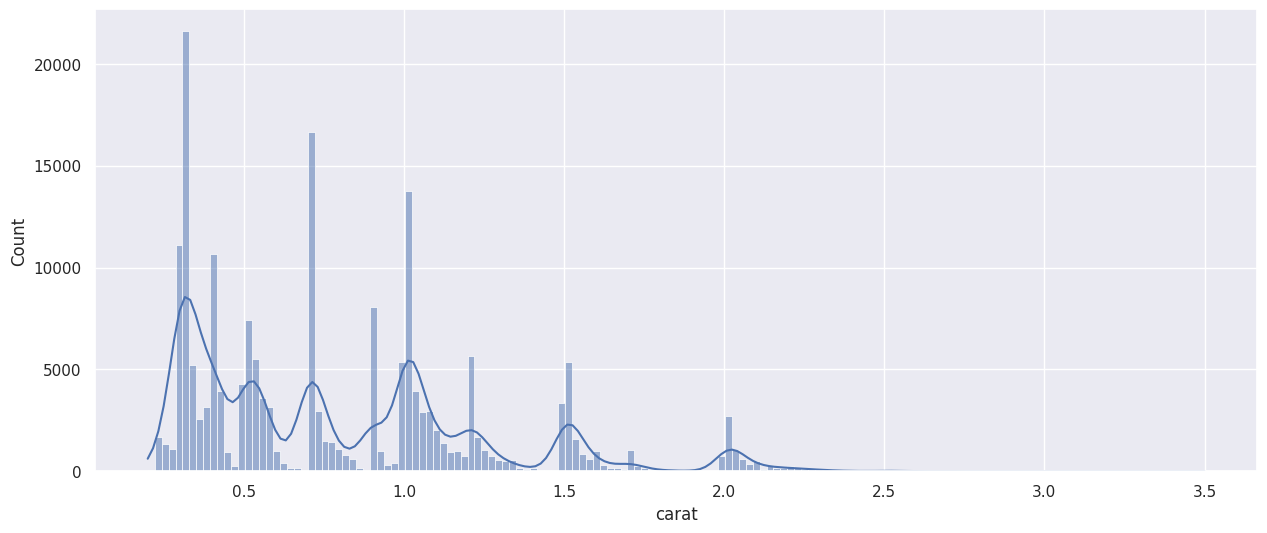

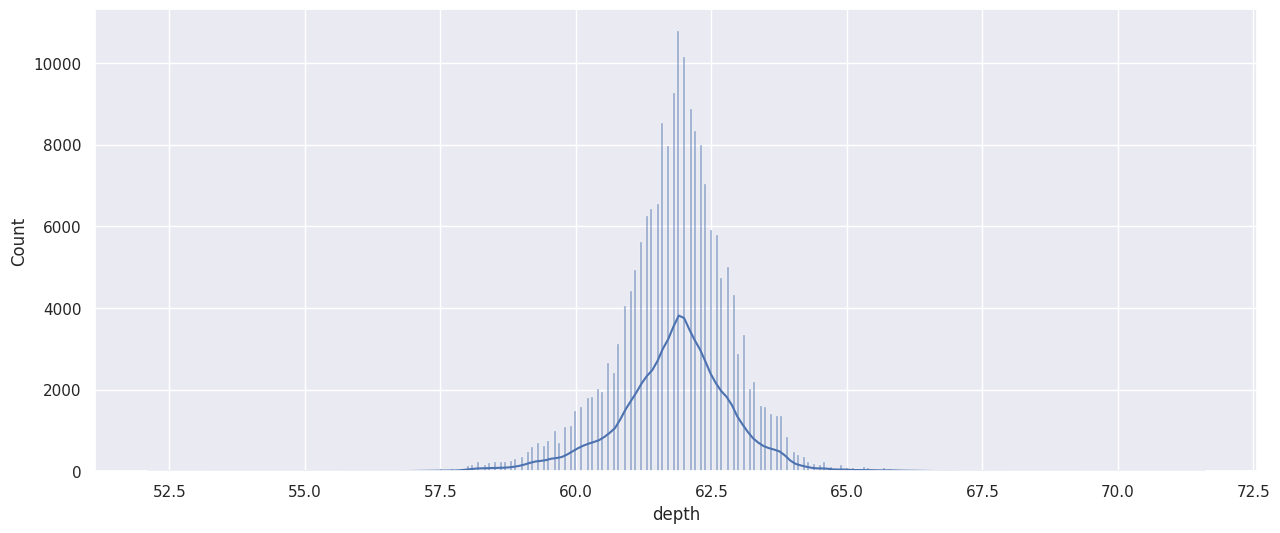

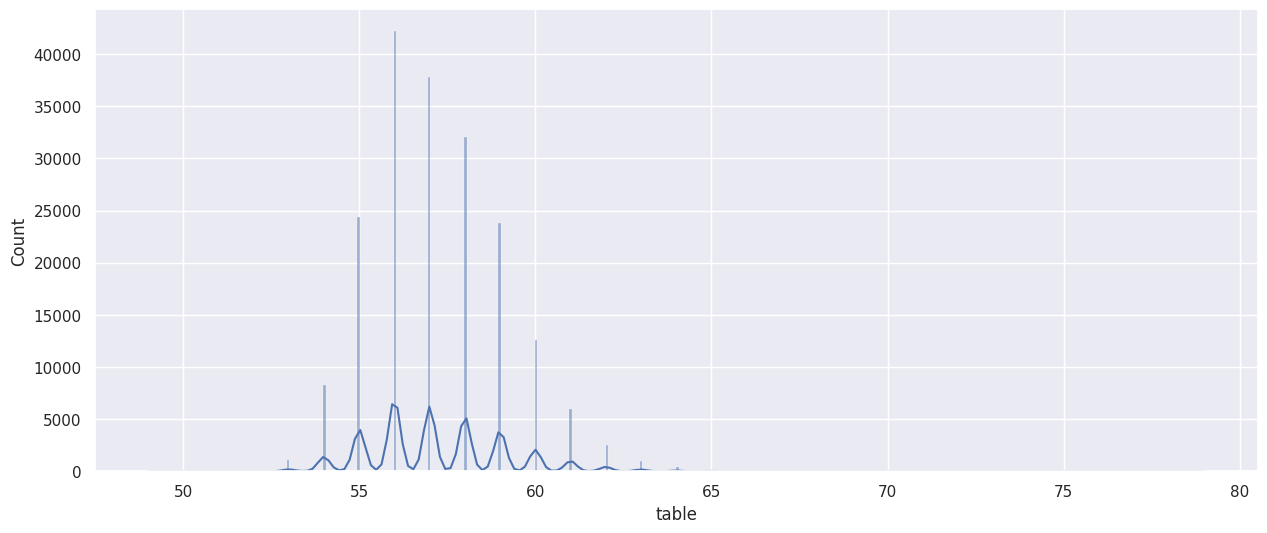

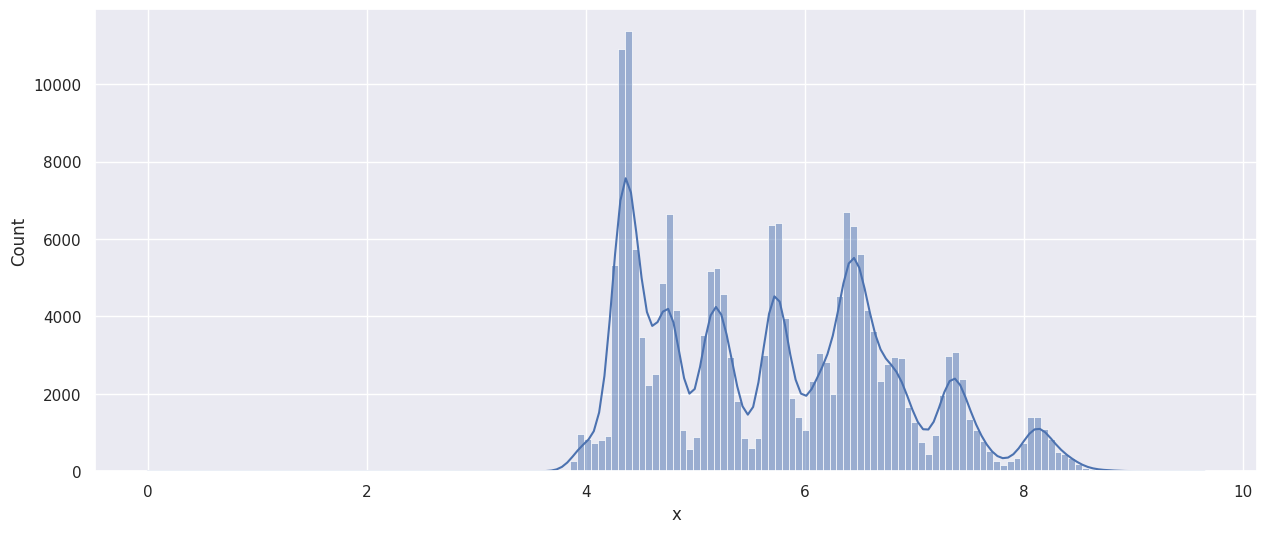

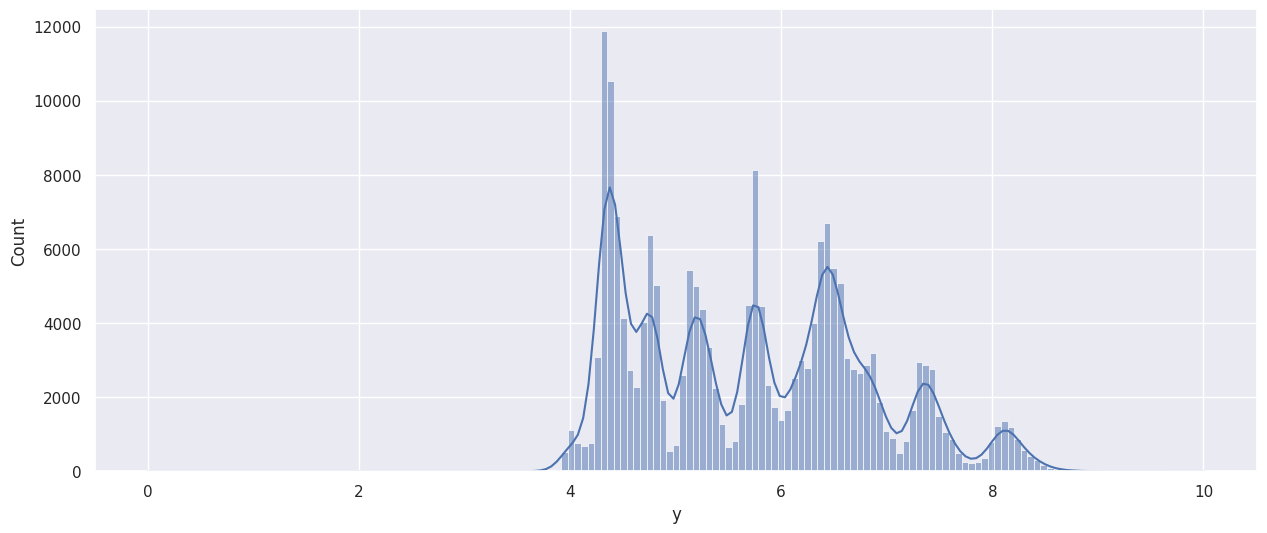

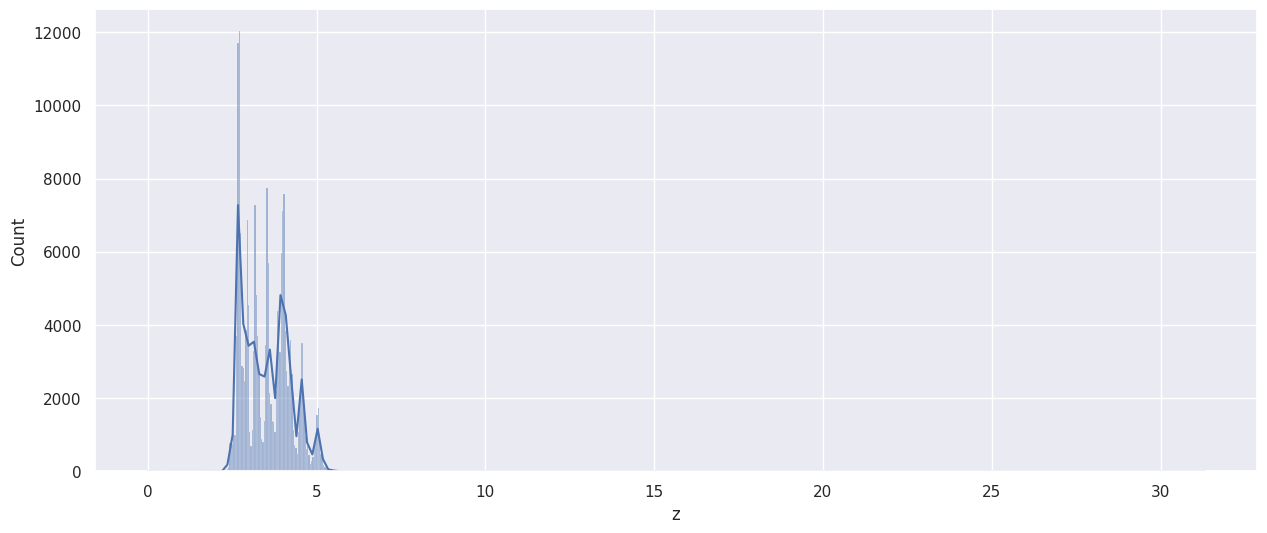

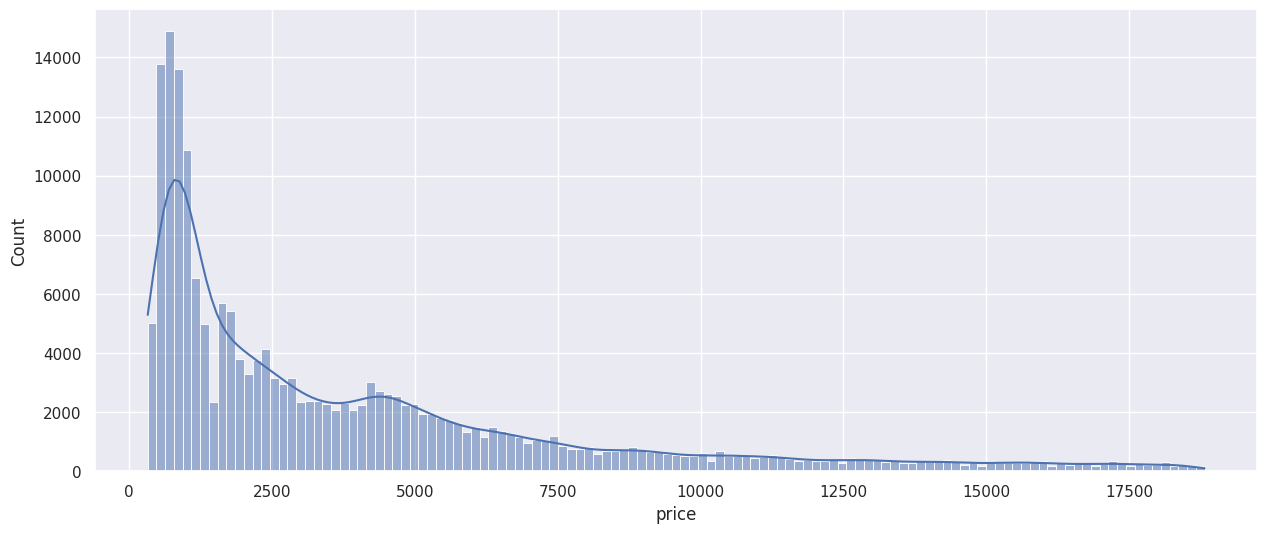

In [13]:
seaborn.set(rc = {'figure.figsize' : (15 , 6)})
for i in num_columns :
    seaborn.histplot(data = df , x = i , kde = True)
    pyplot.show()

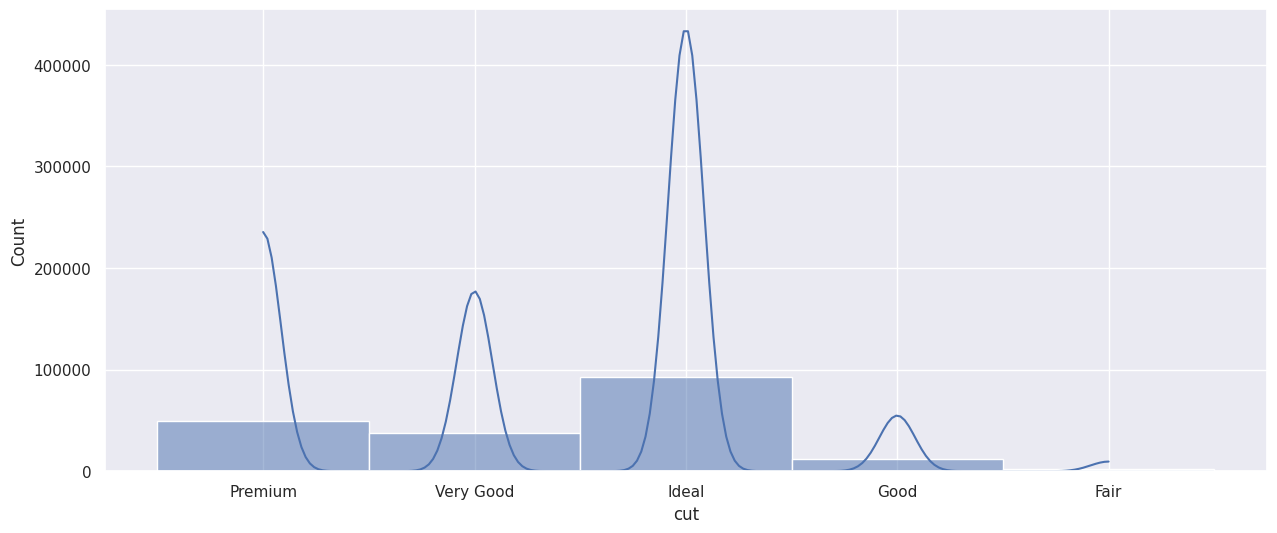

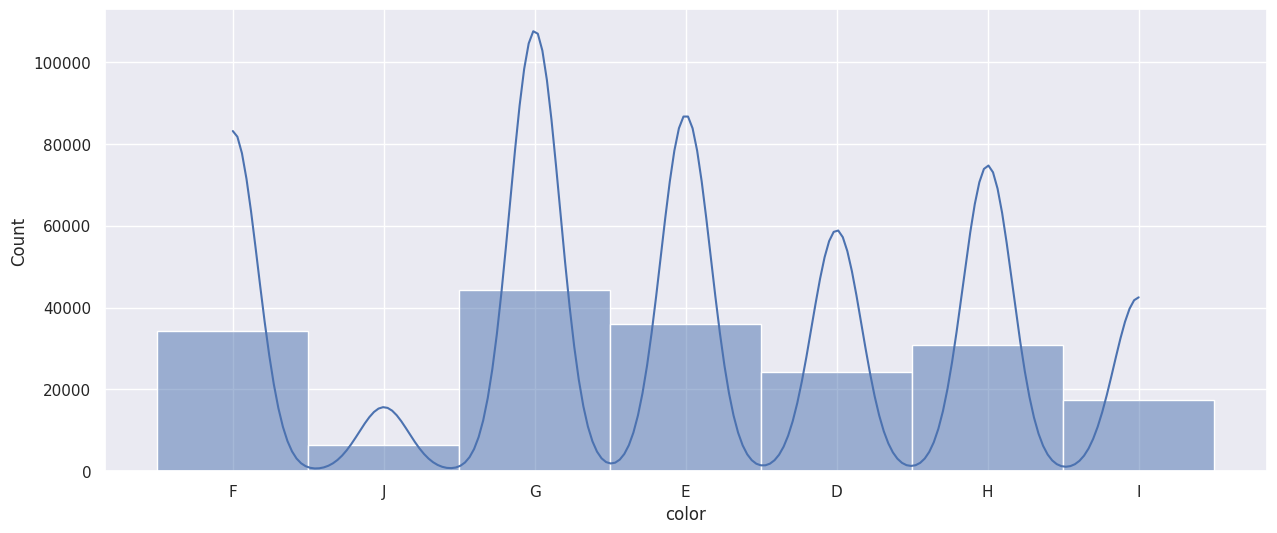

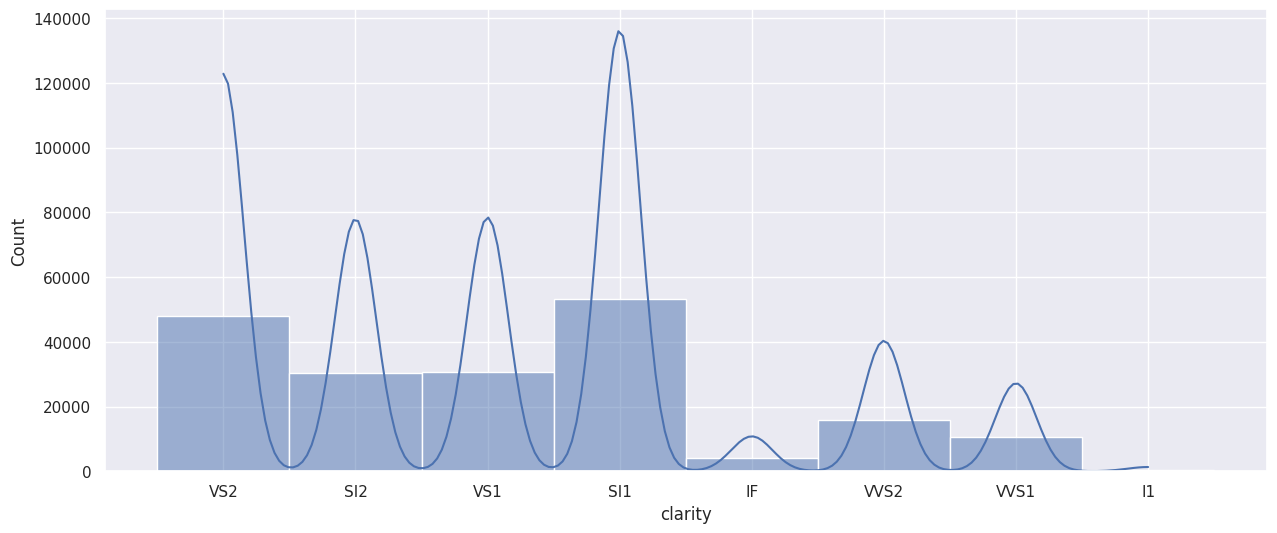

In [14]:
for i in cat_columns :
    seaborn.histplot(data = df , x = i , kde = True)
    pyplot.show()

<Axes: >

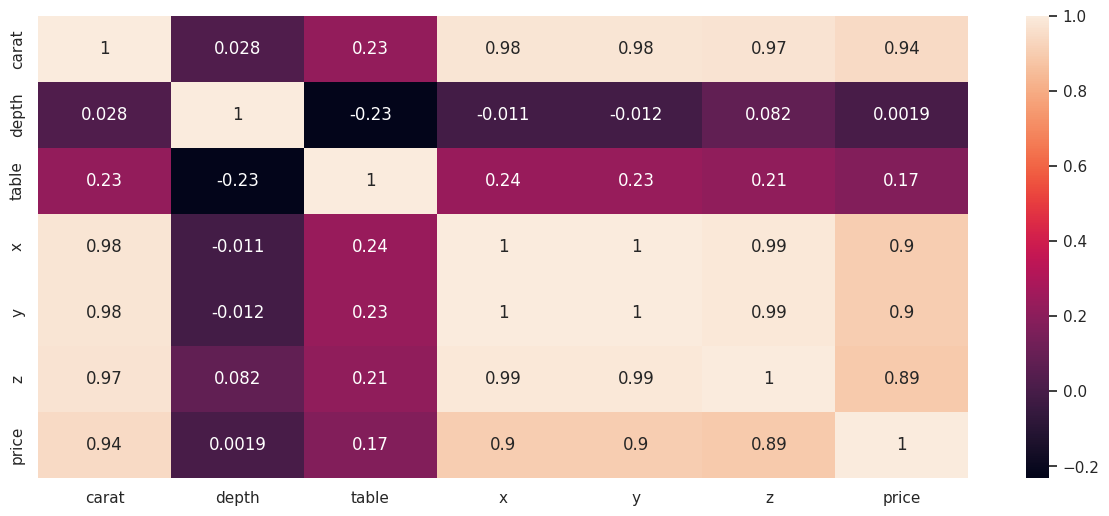

In [15]:
seaborn.heatmap(df[num_columns].corr() , annot = True)

From the above diagram of correlation we can conclude that column x , y , z and carat are all highly correlated with price. This is called as multicolinearity. Later we can drop any three of x , y , z and carat.

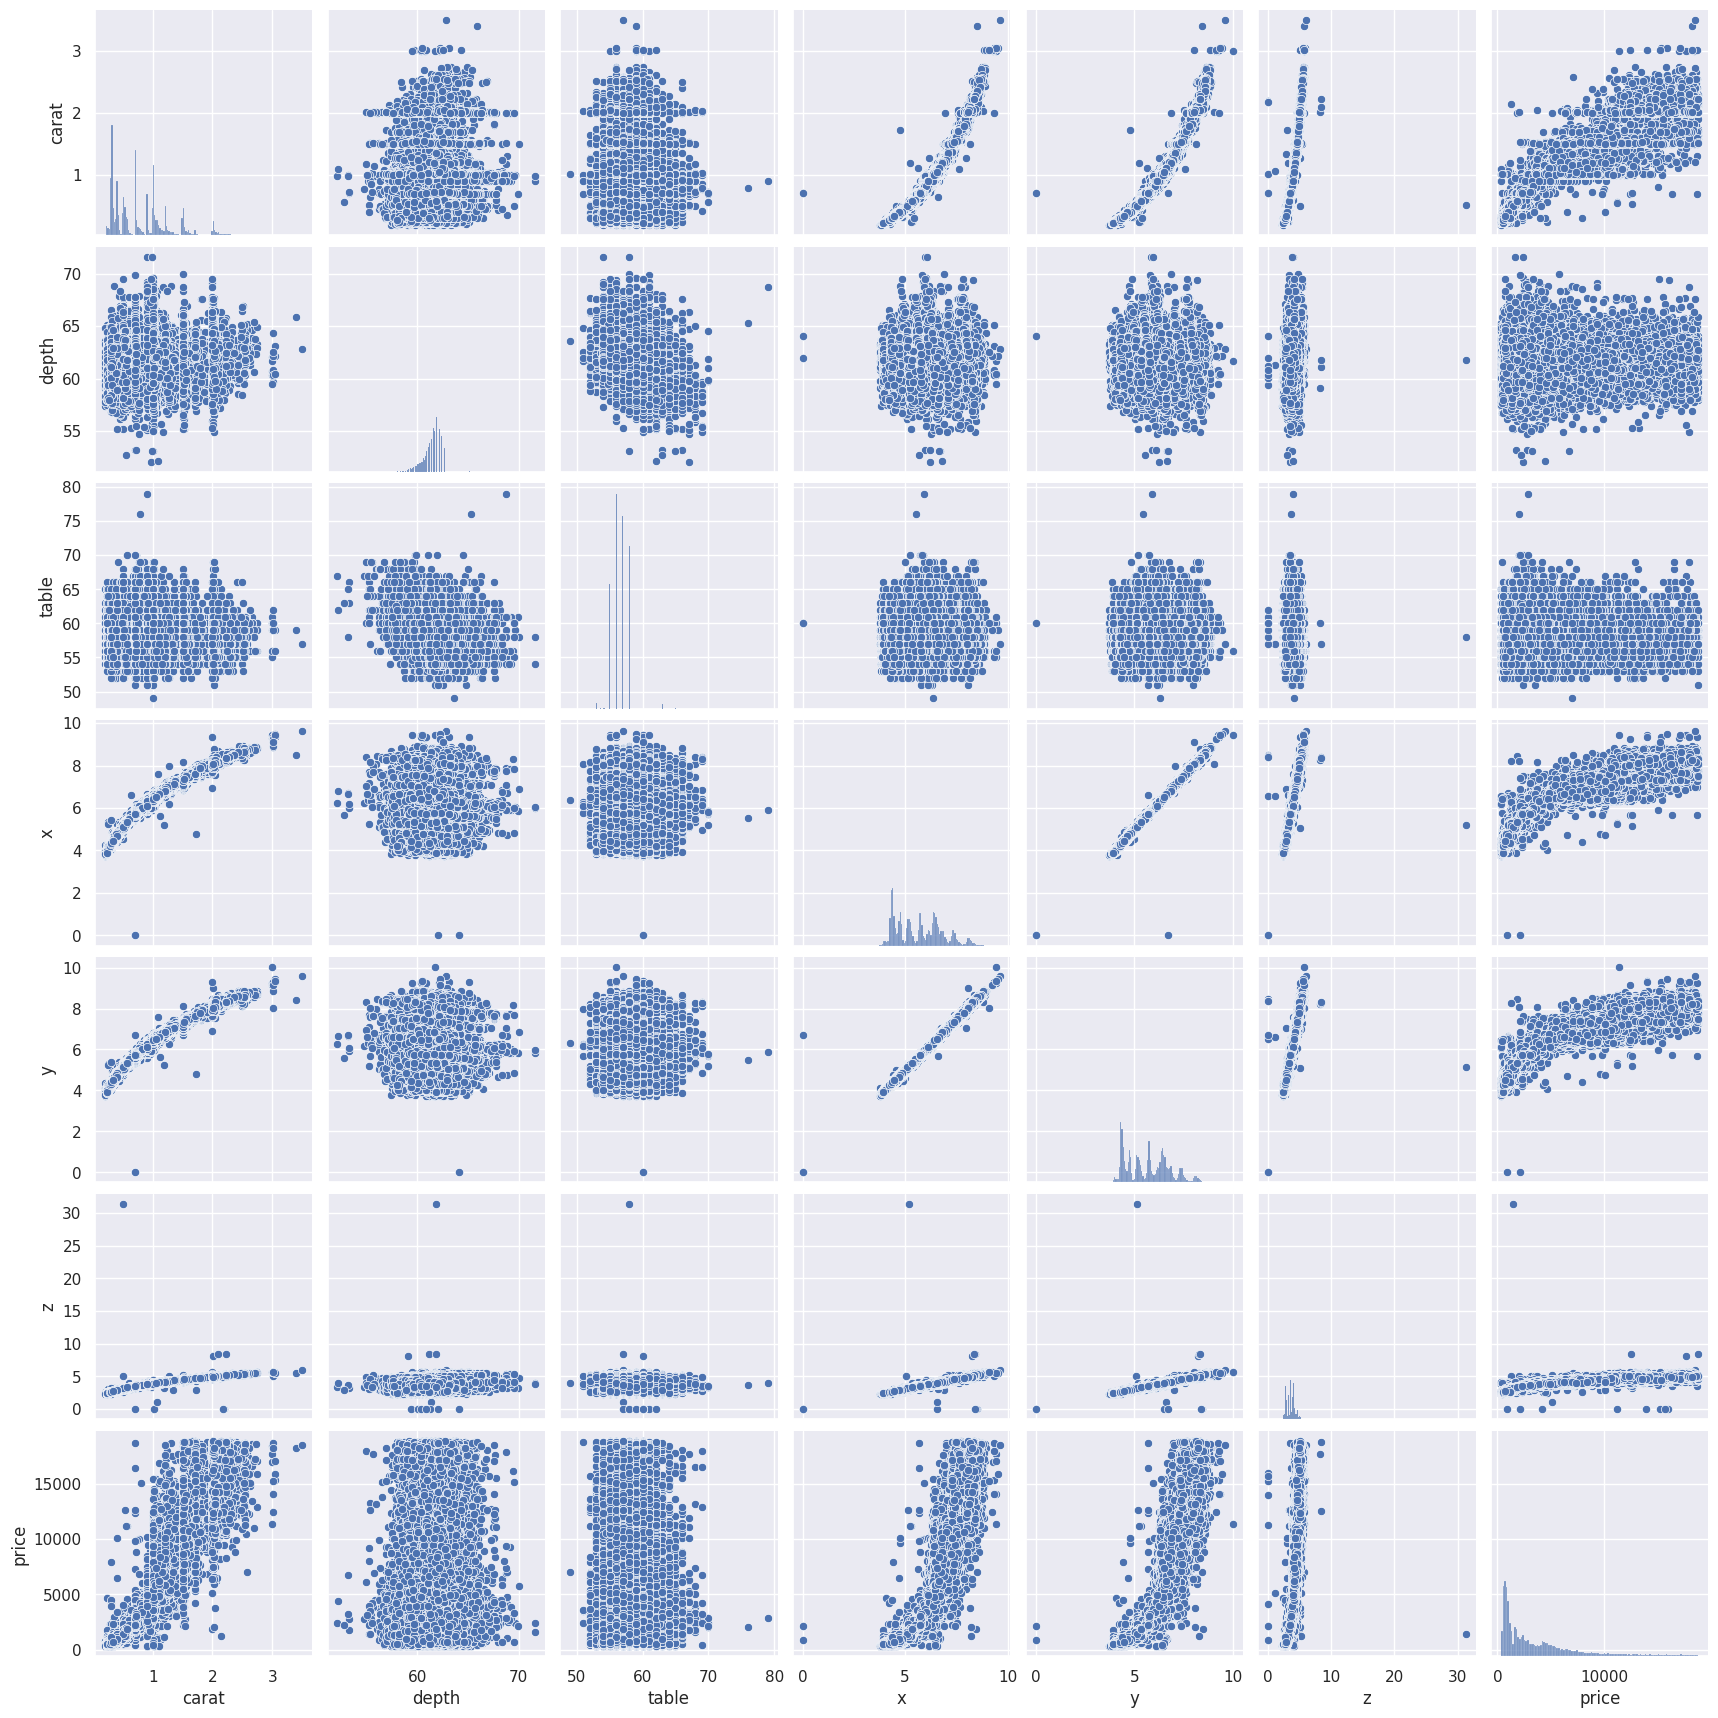

In [16]:
seaborn.pairplot(df)